# Import and Load dataSet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mat = loadmat("ex7data2.mat")
X = mat["X"]

# Cluster Assignment

In [26]:
def findClosestCentroids(X, centroids):
    
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [27]:
#checking
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


# Move centroid

In [29]:
def computeCentroids(X, idx, K):
    
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count

In [30]:
#checking
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


# Random Initializaton of Cluster

In [ ]:
def kMeansInitCentroids(X, K):
    
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

# Model Execution

In [42]:
def plotKmeans(X, centroids, idx, K, num_iters):
    
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()

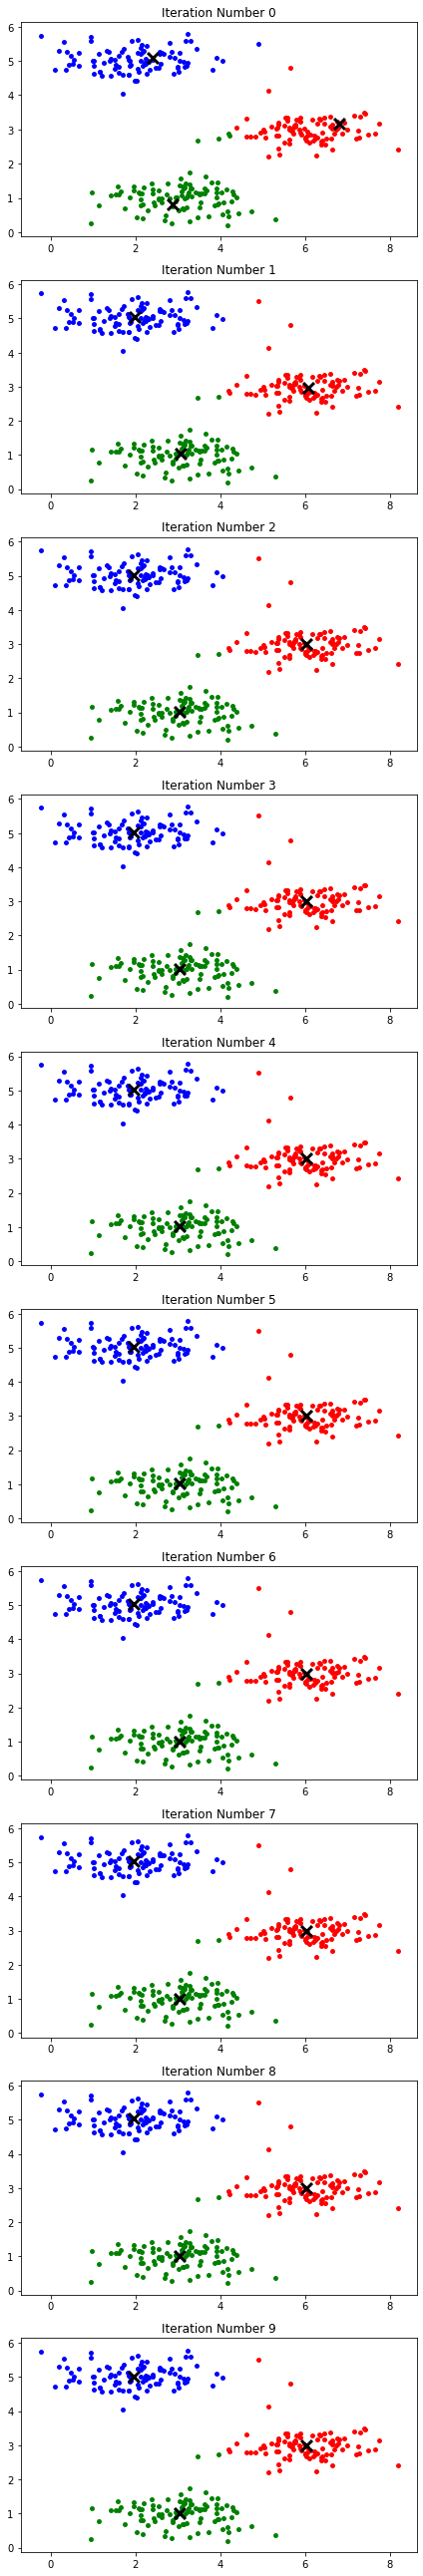

In [46]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids,idx, K,10)